In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.gridspec as gridspec
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
#import pymc3 as pm

In [22]:
import pickle
def loadPickle(name):
    return pickle.load(open('pickles/{}.pickle'.format(name),'rb'))


def reWriteTicks(ticks):
    for i in range(len(ticks)):
        tick = ticks[i].split('_')
        if len(tick)==2:
            supportType = tick[0]
            if supportType == 'ds':
                ticks[i] = tick[1].capitalize()+' ({})'.format('Df')
            elif supportType =='s':
                ticks[i] = tick[1].capitalize()+' ({})'.format('A')
        elif ticks[i]=='domsup':
            ticks[i]='Domestic'
    return ticks


new_headers = loadPickle('new_headers')

In [23]:
new_headers

['s_safemem',
 's_safelead',
 's_headquar',
 's_traincamp',
 's_training',
 's_weaponlog',
 's_finaid',
 's_transport',
 's_troop',
 'ds_safemem',
 'ds_safelead',
 'ds_headquar',
 'ds_traincamp',
 'ds_training',
 'ds_weaponlog',
 'ds_finaid',
 'ds_transport',
 'domsup',
 'Ideology (Active Support)',
 'Ideology (De-facto Support)',
 'Objective (Active Support)',
 'Objective (De-facto Support)',
 'Year from BRD',
 'Life-span']

In [9]:
fname='regression.csv'
headers=open(fname,'r').readline().strip().split(',')
n=len(headers)

df = pd.read_csv(fname,low_memory=False,usecols=[i for i in range(0,n)],header=None)
df = df.replace('',np.nan, regex=True)

df.dropna(how='any', inplace=True)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.866667,1.000000,0.866667,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,0.133333,...,0.133333,0.133333,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,1.0,9
1,0.933333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,...,0.066667,1.000000,1.000000,0.000000,0.400000,0.200000,0.200000,0.400000,1.0,5
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.400000,0.200000,0.571429,0.142857,0.0,4
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.388889,0.444444,0.800000,0.400000,1.0,5
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.407407,0.629630,0.600000,0.533333,1.0,52
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.384615,0.384615,0.400000,0.400000,1.0,1
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.388889,0.444444,0.263158,0.315789,1.0,4
7,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,0.0,8
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.971014,1.000000,0.000000,0.333333,0.291667,0.600000,0.600000,1.0,23
11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.450000,0.400000,0.380952,0.238095,1.0,12


In [10]:
X = df.drop(23, axis=1)
X[22]=(X[22]-X[22].min())/(X[22].max()-X[22].min())


y  = df.loc[:, 23]
maxYear = y.max()
minYear = y.min()
y=(y-y.min())/(y.max()-y.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[[0, (0, 1)], [0, (1, 2)], [0, (2, 3)], [0, (3, 4)], [0, (4, 5)], [0, (5, 6)], [1, (0, 1)], [1, (1, 2)], [1, (2, 3)], [1, (3, 4)], [1, (4, 5)], [1, (5, 6)], [2, (0, 1)], [2, (1, 2)], [2, (2, 3)], [2, (3, 4)], [2, (4, 5)], [2, (5, 6)], [3, (0, 1)], [3, (1, 2)], [3, (2, 3)], [3, (3, 4)], [3, (4, 5)], [3, (5, 6)]]


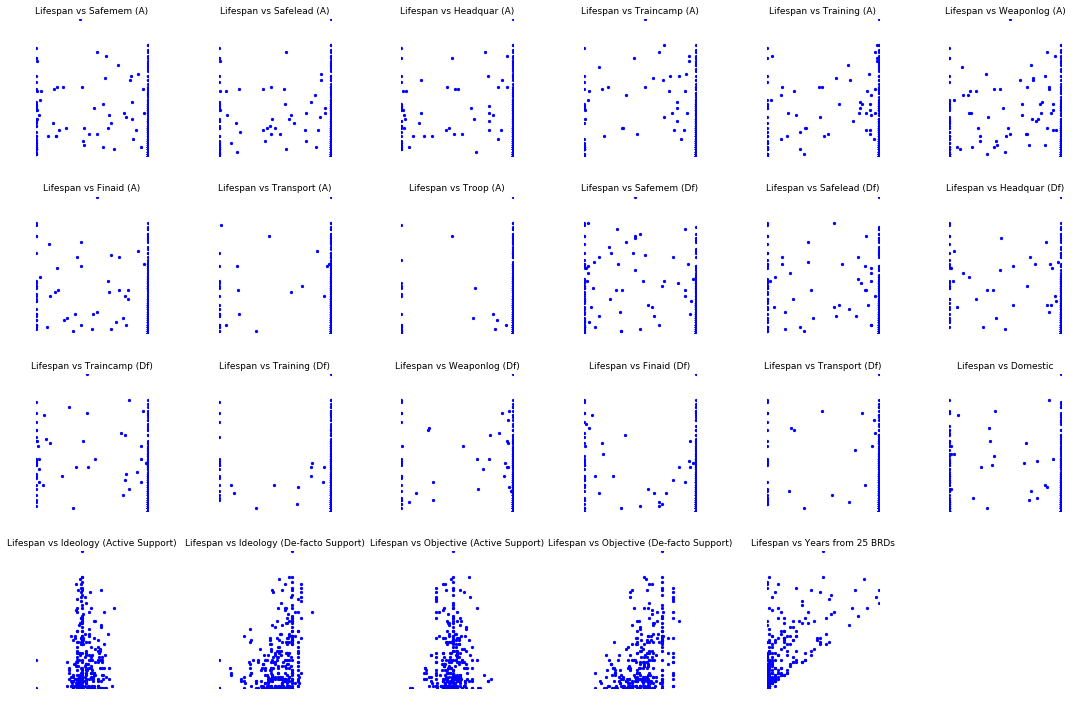

In [25]:
rew_headers = reWriteTicks(new_headers)
rew_headers[-2] = "Years from 25 BRDs"
plt.close()
plt.figure(figsize = (15,10))
gs = gridspec.GridSpec(4,6)
rowcols = [[i,(j,j+1)] for i in range(4) for j in range(6)]
index = 0
print(rowcols)
for i in range(len(X))[0:23]:
    row,colA,colB = rowcols[index][0],rowcols[index][1][0],rowcols[index][1][1]
    index+=1
    
    plt.axis('off')

    plt.subplot(gs[row,colA:colB])
    plt.scatter(X[i], y,color='b',s=5)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis("off")
    plt.title("Lifespan vs {}".format(rew_headers[i]),size=9)
    
plt.tight_layout()
plt.savefig("images/{}.png".format('scatter_relation'),bbox_inches='tight')
plt.show()

In [21]:
rew_headers

['Safemem (A)',
 'Safelead (A)',
 'Headquar (A)',
 'Traincamp (A)',
 'Training (A)',
 'Weaponlog (A)',
 'Finaid (A)',
 'Transport (A)',
 'Troop (A)',
 'Safemem (Df)',
 'Safelead (Df)',
 'Headquar (Df)',
 'Traincamp (Df)',
 'Training (Df)',
 'Weaponlog (Df)',
 'Finaid (Df)',
 'Transport (Df)',
 'Domestic',
 'Ideology (Active Support)',
 'Ideology (De-facto Support)',
 'Objective (Active Support)',
 'Objective (De-facto Support)',
 'Year from BRD',
 'Years from 25 BRDs']

In [38]:
X

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.866667,1.000000,0.866667,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,0.133333,...,1.000000,0.133333,0.133333,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,0.026316
1,0.933333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,...,1.000000,0.066667,1.000000,1.000000,0.000000,0.400000,0.200000,0.200000,0.400000,0.026316
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,0.200000,0.571429,0.142857,0.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.388889,0.444444,0.800000,0.400000,0.026316
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.407407,0.629630,0.600000,0.533333,0.026316
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.384615,0.384615,0.400000,0.400000,0.026316
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.388889,0.444444,0.263158,0.315789,0.026316
7,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,0.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.836957,1.000000,0.971014,1.000000,0.000000,0.333333,0.291667,0.600000,0.600000,0.026316
11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.450000,0.400000,0.380952,0.238095,0.026316


In [40]:
# Create the model and fit on the data
lr = LinearRegression()
lr.fit(X, y)
print('Intercept from library:', lr.intercept_)
print('Slope from library:', lr.coef_[0])

Intercept from library: 0.04441728208751031
Slope from library: -0.058448547969443106


In [44]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 21]
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:03<00:00, 879.43draws/s] 
The acceptance probability does not match the target. It is 0.894688330384677, but should be close to 0.8. Try to increase the number of tuning steps.


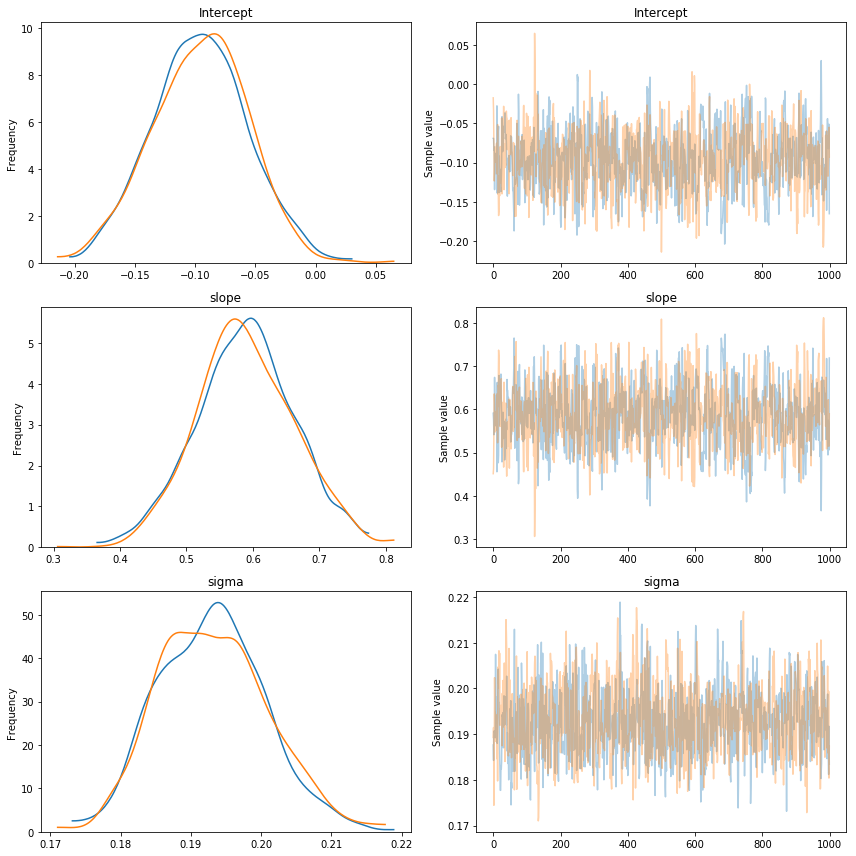

In [45]:
pm.traceplot(linear_trace, figsize = (12, 12));

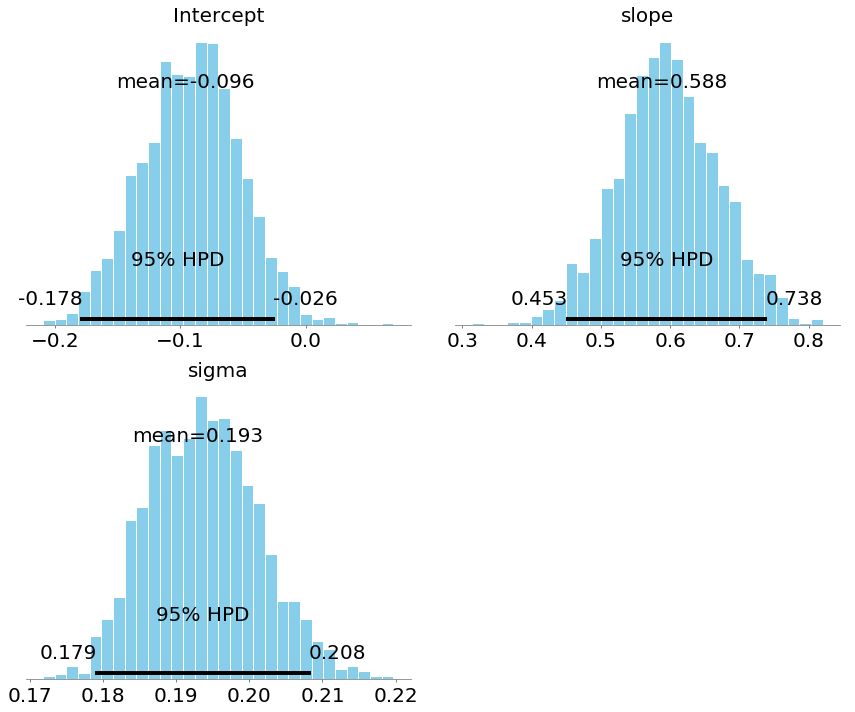

In [46]:
pm.plot_posterior(linear_trace, figsize = (12, 10), text_size = 20);


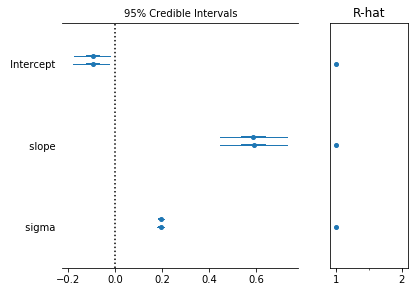

In [47]:
pm.forestplot(linear_trace);


In [142]:
# Complete data
mse = mean_squared_error(y,y_predict)
var_error = explained_variance_score(y,y_predict)

print(mse,var_error)

0.0208892266061 0.531993726023


In [39]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [14]:
y_predict = reg.predict(X_test)
# Complete data
mse = mean_squared_error(y_test,y_predict)
var_error = explained_variance_score(y_test,y_predict)

print(mse,var_error)

0.019545024214941774 0.5214676099302961


In [125]:
def predictThrivingYears(x,y,z,a,b,c): 
    activeSupportDeprivation = x
    defactoSupportDeprivation = y
    domesticSupportDeprivation = z
    Support_Ideology = a
    Support_Objective = b
    BRD_After_Years = (c - minYear)/(maxYear-minYear)


    temp = [activeSupportDeprivation]*9 + [defactoSupportDeprivation]*8 + [domesticSupportDeprivation]
    temp = temp + [Support_Ideology]*2 + [Support_Objective]*2 +[BRD_After_Years]
    
    year = reg.predict([temp])*(maxYear-minYear)+minYear
    year = year[0] if year[0]>=0 else 0
    
    print("Predicted thriving years: ",year)

In [126]:
# Test-cases - A

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0.5 # Probability for receving support based upon ideology
b = 0.5 # Probability for receiving support based upon objective
c = 4 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  8.51959767909


In [127]:
# Test-cases - B

x = 0 # Active Support Deprivation
y = 0 # DeFacto Support Deprivation
z = 0 # Domestic Support Deprivation
a = 0.5 # Probability for receving support based upon ideology
b = 0.5 # Probability for receiving support based upon objective
c = 4 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  16.7682170492


In [128]:
# Test-cases - C

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0 # Probability for receving support based upon ideology
b = 0 # Probability for receiving support based upon objective
c = 4 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  0.333873342085


In [129]:
# Test-cases - D

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0 # Probability for receving support based upon ideology
b = 0 # Probability for receiving support based upon objective
c = 0 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  0


In [131]:
# Test-cases - E

x = 0 # Active Support Deprivation
y = 0 # DeFacto Support Deprivation
z = 0 # Domestic Support Deprivation
a = 0 # Probability for receving support based upon ideology
b = 0 # Probability for receiving support based upon objective
c = 0 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  6.5423338438


In [132]:
# Test-cases - F

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0.99 # Probability for receving support based upon ideology
b = 0.99 # Probability for receiving support based upon objective
c = 1 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  15.0114883781


In [144]:
# Test-cases - G

x = 0 # Active Support Deprivation
y = 0 # DeFacto Support Deprivation
z = 0 # Domestic Support Deprivation
a = 1 # Probability for receving support based upon ideology
b = 1 # Probability for receiving support based upon objective
c = 21 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  33.6246165768
